In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\bossv\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


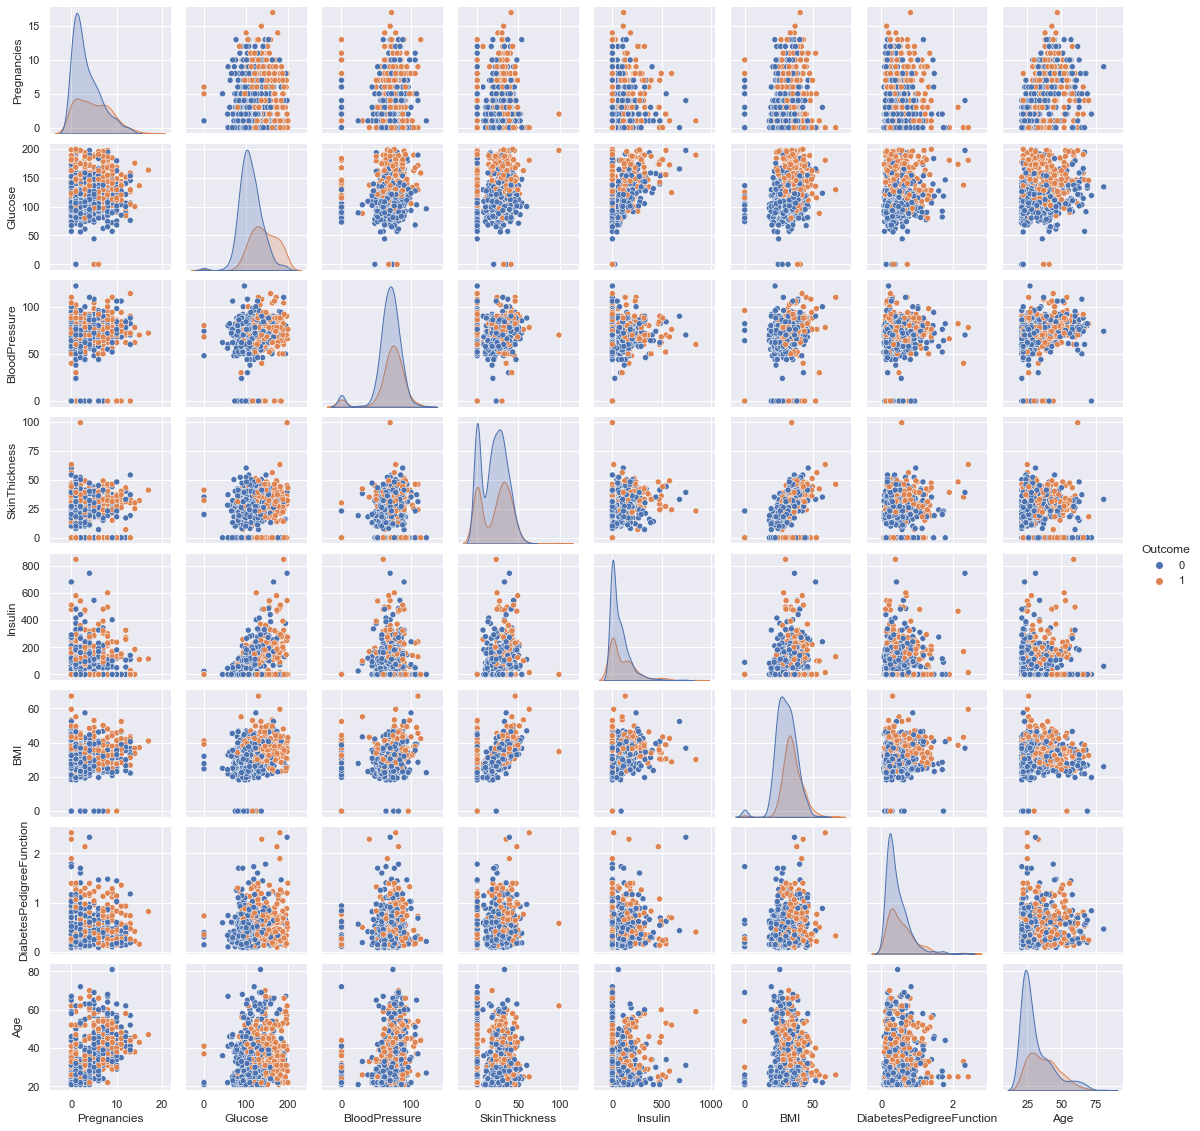

In [13]:
sb.set()
sb.pairplot(df,hue="Outcome",size=2)
plt.show()

Test Score1 :  67.53246753246754
Test Score2 :  71.75324675324676
Test Score3 :  70.45454545454545
Test Score4 :  74.35064935064936
Test Score5 :  72.07792207792207
Test Score6 :  74.67532467532467
Test Score7 :  76.94805194805194
Test Score8 :  77.27272727272727


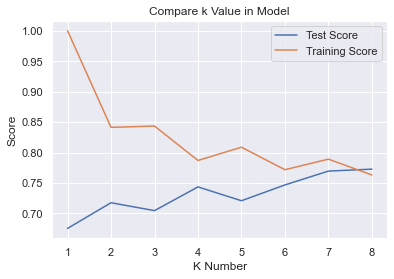

In [40]:
#data & outcome data
x = df.drop("Outcome",axis=1).values
y = df["Outcome"].values

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.4)

# find k to model
k_neighbors = np.arange(1,9)
training_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

for i,k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #วัดประสิทธิภาพ
    training_score[i] = knn.score(x_train,y_train)
    test_score[i] = knn.score(x_test,y_test)
    print("Test Score"+str(i+1)+" : ",test_score[i]*100)

plt.title("Compare k Value in Model")
plt.plot(k_neighbors,test_score,label="Test Score")
plt.plot(k_neighbors,training_score,label="Training Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

In [47]:
knn = KNeighborsClassifier(n_neighbors=8)

#train
knn.fit(x_train,y_train)

#prediction
y_pred = knn.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       209
           1       0.68      0.55      0.61        99

    accuracy                           0.77       308
   macro avg       0.74      0.71      0.72       308
weighted avg       0.76      0.77      0.77       308

[[184  25]
 [ 45  54]]


In [54]:
pd.crosstab(y_test,y_pred,rownames=["Actually"],colnames=["Prediction"],margins=True)

Prediction,0,1,All
Actually,,,
0,184,25,209
1,45,54,99
All,229,79,308
